# Install the pydot pacakge for visualizing decision tree##


In [1]:
!pip install pydotplus

^C


# Install graphviz##


In [ ]:
#Windows User: https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/
#Set the path variable
#(a) Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit
#(b) add 'C:\Program Files (x86)\Graphviz2.38\bin'
#(C) open the command prompt as admin and type dot -c to register. You can verify it by typing dot -v
#Mac User: brew install graphviz

##Then: 
!conda install graphviz

# Load all necessary packages##


In [1]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
import pydotplus
from sklearn import tree
import pandas as pd
import numpy as np

C:\Users\linan\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Load the data##


In [2]:
dat = pd.read_csv('Playgolf.txt',sep='\t')

In [3]:
dat

,Day,Outlook,Temperature,Humidity,Wind,Play Golf
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Load the data into Pandas Datafrome###


In [4]:
#####Load the attributes into Dataframe X, with column names as attributes names###
X = dat.iloc[:,1:5]
#####Load the target attribute into Dataframe y, with each category named with target names###
y = dat.iloc[:,5]

In [5]:
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


# convert the categorical variable into dummy format##


In [6]:
y = pd.get_dummies(y)
X = pd.get_dummies(X)

In [13]:
X

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


# Initialize a Decision Tree classifier in sklearn package##

In [7]:
dt = DecisionTreeClassifier(criterion='entropy')

# Train the classification tree model with training data##

In [8]:
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Plot the decision tree##


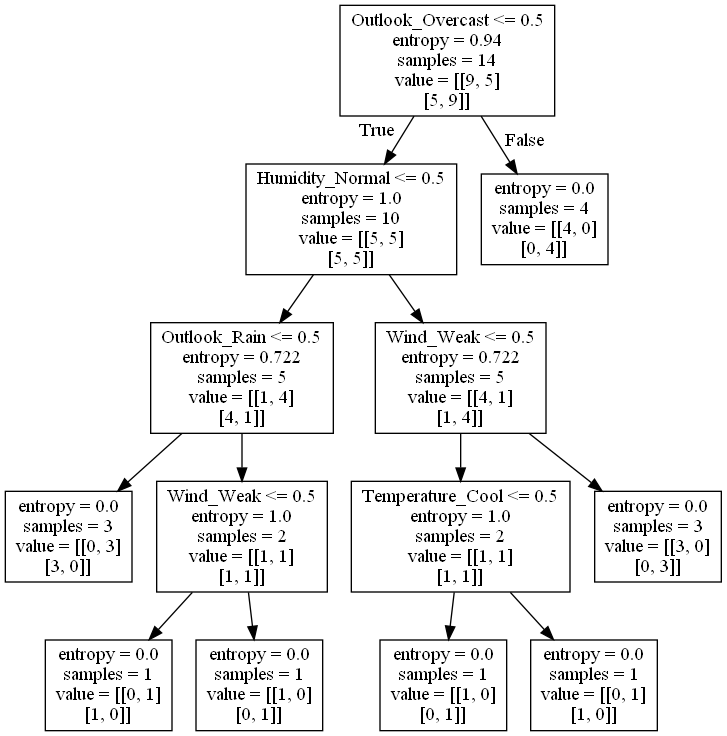

In [9]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Pruning the Tree

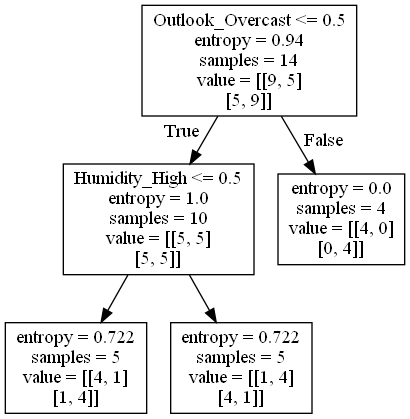

In [12]:
dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.15)
dt.fit(X, y)
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())